# PREMs (PEA Renewable Energy Management System)

# Project1 - Web interface for PEA Renewable energy Realtime Monitoring 

 ![alt text](PREMS.png)

# Project2 - Solar Power Forecasting Module

1. Import 

In [75]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
kW = pd.read_csv('n2_solar_2017.csv')

import datetime

kW_datetime = kW[['time','date']]
# df['YearQuarter'] = ​df[['Year','Quarter']].apply(lambda x : '{}{}'.format(x[0],x[1]), axis=1)
# change_datetime['full_date'] = change_datetime[['pretty','year']].apply(lambda x : '{} {}'.format(x[0],x[1]), axis=1)
formats = '%H:%M %Y-%m-%d'
kW_datetime['full_date'] = kW_datetime[['time','date']].apply(lambda x : datetime.datetime.strptime('{} {}'.format(x[0],x[1]),formats), axis=1)
kW_datetime

kWnew=kW_datetime.drop(['time','date'], axis=1)

kW1=pd.concat([kWnew, kW], axis=1)

kW2=kW1.drop(['COLUMN1','time','date'], axis=1)

kW2 = kW2.set_index('full_date')


# kW2 = kW2.drop_duplicates(keep='first')
kW2 = kW2.sort_index()
kW2_shift1 = kW2['mw'].shift(1)
kW2_shift2 = kW2['mw'].shift(2)
kW2_shiftm2 = kW2['mw'].shift(-2)
kW2_shiftm4 = kW2['mw'].shift(-4)
kW2_shiftm6 = kW2['mw'].shift(-6)
kW2_shiftm8 = kW2['mw'].shift(-8)
kW2_shiftm10 = kW2['mw'].shift(-10)
kW2_shiftm12 = kW2['mw'].shift(-12)
kW2 = pd.concat([kW2,kW2_shift1,kW2_shift2,kW2_shiftm2,kW2_shiftm4,kW2_shiftm6,kW2_shiftm8,kW2_shiftm10,kW2_shiftm12],axis=1)
kW2.columns = ['mw','mw_15m_ahead','mw_30m_ahead','mw_30m','mw_60m','mw_90m','mw_120m','mw_150m','mw_180m'] 
# kW2 = pd.concat([kW2,kW2_shift1,kW2_shift2],axis=1)
# kW2.columns = ['mw','mw_15m_ahead','mw_30m_ahead']
# kW2.head(50)
# target=data_profile3['mw'].shift(-1)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [77]:
# kW2

In [78]:
weather = pd.read_csv('data_weather_2017.csv')

# weather.info()

In [79]:
import datetime

weather_datetime = weather[['pretty','year']]
# df['YearQuarter'] = ​df[['Year','Quarter']].apply(lambda x : '{}{}'.format(x[0],x[1]), axis=1)
# change_datetime['full_date'] = change_datetime[['pretty','year']].apply(lambda x : '{} {}'.format(x[0],x[1]), axis=1)
formats = '%I:%M %p +07 on %B %d %Y'
weather_datetime['full_date'] = weather_datetime[['pretty','year']].apply(lambda x : datetime.datetime.strptime('{} {}'.format(x[0],x[1]),formats), axis=1)
weather_datetime1=weather_datetime.drop(['pretty','year'], axis=1)

weather_datetime2 = pd.concat([weather_datetime1,weather.loc[:,['tempm','dewptm','hum','wspdm','wdire','vism','pressurem','conds','fog','rain','snow','hail','thunder','tornado']]], axis=1)
# weather_datetime2 = weather_datetime2.set_index('full_date')

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [26]:
# weather_datetime2

In [20]:
# weather_profile=kW2.join(weather_datetime2.set_index('full_date'))

In [80]:
#รวมตารางอากาศกับกำลังไฟฟ้า
# weather_profile=pd.merge(weather_datetime2,kW2,on='full_date')
weather_profile=weather_datetime2.set_index('full_date').join(kW2)

#one hot encoding column conds and wdire
weather_profile1= pd.get_dummies( weather_profile['conds'],drop_first=True)
weather_profile2= pd.get_dummies( weather_profile['wdire'],drop_first=True)

#รวมข้อมูลตารางที่ทำ one hot 
weather_profile3 = pd.concat([weather_profile,weather_profile1,weather_profile2], axis=1)

#drop column ที่ทำ one hot
data_profile=weather_profile3.drop(['wdire','conds'], axis=1)
# data_profile
# format = '%I:%M %p +07 on %B %d %Y'
# print(datetime.strptime(df_test, format))

In [81]:
#drop ข้อมูลที่ซ้ำทิ้ง
data_profile=data_profile.drop_duplicates(keep='first')
# data_profile

In [82]:
# data_profile[['mw','tempm','hum']]

In [84]:
data_profile.head()

,tempm,dewptm,hum,wspdm,vism,pressurem,fog,rain,snow,hail,...,NW,North,SE,SSE,SSW,SW,South,WNW,WSW,West
full_date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 01:00:00,25,19,62,0.0,10.0,1017,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-01 04:00:00,24,20,73,0.0,10.0,1016,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-01 07:00:00,23,20,76,5.6,9.0,1017,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-01 10:00:00,24,20,72,5.6,8.0,1019,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2017-01-01 13:00:00,27,19,56,7.4,10.0,1016,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [85]:
# sns.pairplot(data_profile[['mw','tempm','hum']])

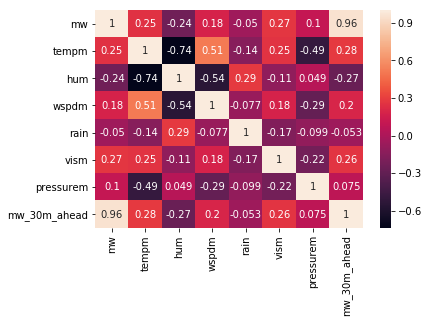

In [86]:
#ดูความสัมพันธ์ของข้อมูล
sns.heatmap(data_profile[['mw','tempm','hum','wspdm','rain','vism','pressurem','mw_30m_ahead']].corr(),annot=True)

In [87]:
#NN train data
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

In [88]:
data_profile2=data_profile

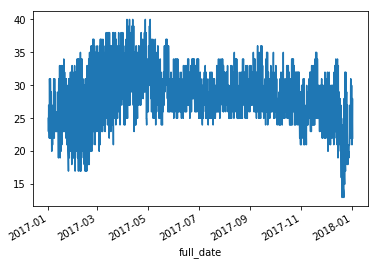

In [89]:
data_profile2['tempm'].plot()

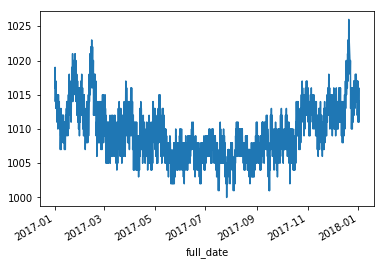

In [90]:
data_profile2['pressurem'].plot()

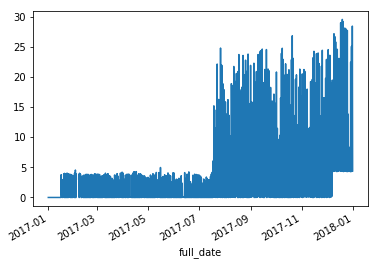

In [91]:
data_profile2['mw'].plot()

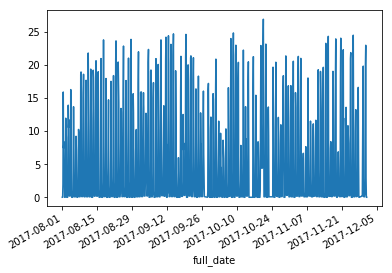

In [92]:
data_profile2['mw']['2017-08':'2017-11'].plot()

In [93]:
#ตัวช่วงที่เป็นprofile ปกติ
data_profile3=data_profile2['2017-08':'2017-11']
# data_profile3

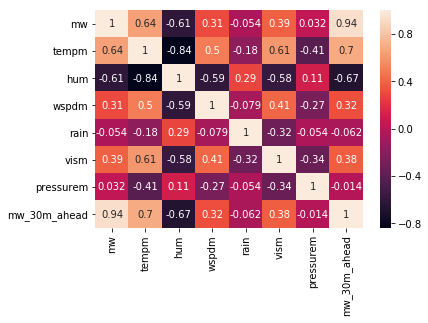

In [94]:
sns.heatmap(data_profile3[['mw','tempm','hum','wspdm','rain','vism','pressurem','mw_30m_ahead']].corr(),annot=True)

In [95]:
#แยกชั่วโมงจากfull_date เพื่อใช้เป็น feature
data_profile3['hour']=data_profile3.index.hour

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [96]:
data_profile3['mw'].head(10)

full_date
2017-08-01 01:00:00     0.00
2017-08-01 04:00:00     0.00
2017-08-01 07:00:00     2.02
2017-08-01 10:00:00    15.89
2017-08-01 13:00:00     7.43
2017-08-01 16:00:00     8.37
2017-08-01 22:00:00     0.00
2017-08-02 01:00:00     0.00
2017-08-02 04:00:00     0.00
2017-08-02 07:00:00     0.11
Name: mw, dtype: float64

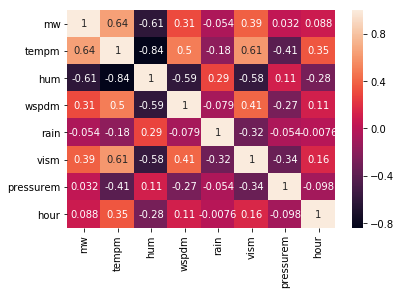

In [97]:
sns.heatmap(data_profile3[['mw','tempm','hum','wspdm','rain','vism','pressurem','hour']].corr(),annot=True)

In [98]:
#การสร้าง target เพื่อให้ X เทียบ Y อนาคต
target=data_profile3[['mw_30m','mw_60m','mw_90m','mw_120m','mw_150m','mw_180m']]
# target=data_profile3['mw_60m']
target.head()
ydata=target
# data_profile3.info()
data_profile4 = data_profile3.drop(['mw_30m','mw_60m','mw_90m','mw_120m','mw_150m','mw_180m'], axis=1)
xdata=data_profile4

In [99]:
ydata.shape

(927, 6)

In [100]:
xtrain=xdata[0:740]
ytrain=ydata[0:740]
print("{} / {}".format(xtrain.shape,ytrain.shape))

(740, 44) / (740, 6)


In [101]:
xtest=xdata[740:928]
ytest=ydata[740:928]
print("{} {}".format(xtest.shape,ytest.shape))

(187, 44) (187, 6)


In [102]:
# print("Min:", np.min(xtrain))
# print("Max:", np.max(xtrain))
# print("Min:", np.min(ytrain))
# print("Max:", np.max(ytrain))

In [103]:
num_x_signals = xdata.shape[1]
num_x_signals

44

In [104]:
num_y_signals = ydata.shape[1]
num_y_signals

6

In [105]:
num_train = 740
num_test = 188

In [106]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740 entries, 2017-08-01 01:00:00 to 2017-11-05 07:00:00
Data columns (total 44 columns):
tempm                           740 non-null int64
dewptm                          740 non-null int64
hum                             740 non-null int64
wspdm                           740 non-null float64
vism                            740 non-null float64
pressurem                       740 non-null int64
fog                             740 non-null int64
rain                            740 non-null int64
snow                            740 non-null int64
hail                            740 non-null int64
thunder                         740 non-null int64
tornado                         740 non-null int64
mw                              740 non-null float64
mw_15m_ahead                    740 non-null float64
mw_30m_ahead                    740 non-null float64
Haze                            740 non-null uint8
Heavy Thunderstorms and Rain    

In [107]:
xtrain.head(20)

,tempm,dewptm,hum,wspdm,vism,pressurem,fog,rain,snow,hail,...,North,SE,SSE,SSW,SW,South,WNW,WSW,West,hour
full_date,,,,,,,,,,,,,,,,,,,,,
2017-08-01 01:00:00,27,23,71,7.4,7.0,1006,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2017-08-01 04:00:00,27,24,75,5.6,7.0,1005,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4
2017-08-01 07:00:00,28,23,70,9.3,7.0,1006,0,0,0,0,...,0,0,0,0,0,0,0,0,1,7
2017-08-01 10:00:00,30,24,62,13.0,8.0,1008,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10
2017-08-01 13:00:00,31,24,57,14.8,8.0,1007,0,0,0,0,...,0,0,0,0,0,0,0,1,0,13
2017-08-01 16:00:00,31,26,69,9.3,6.0,1005,0,1,0,0,...,0,0,0,0,0,0,0,0,1,16
2017-08-01 22:00:00,29,23,66,11.1,5.0,1008,0,0,0,0,...,0,0,0,0,0,0,0,0,1,22
2017-08-02 01:00:00,28,25,79,0.0,10.0,1007,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2017-08-02 04:00:00,27,25,87,0.0,10.0,1005,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [108]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(xtrain)
x_test_scaled = x_scaler.transform(xtest)
# y_train_scaled = y_scaler.fit_transform(ytrain.reshape(-1, 1))
# y_test_scaled = y_scaler.transform(ytest.reshape(1, -1))
y_train_scaled = y_scaler.fit_transform(ytrain)
y_test_scaled = y_scaler.transform(ytest)

In [109]:
# y_train = ytrain.reshape(-1, 1)
# y_test = ytest.reshape(-1, 1)
y_train = ytrain
y_test = ytest
y_test.tail()

,mw_30m,mw_60m,mw_90m,mw_120m,mw_150m,mw_180m
full_date,,,,,,
2017-11-30 10:00:00,21.36,21.24,23.46,16.38,19.13,22.95
2017-11-30 13:00:00,17.27,21.05,14.79,13.86,10.50,2.90
2017-11-30 16:00:00,4.41,2.44,0.00,0.00,0.00,0.00
2017-11-30 19:00:00,0.00,0.00,0.00,0.00,0.00,0.00
2017-11-30 22:00:00,0.00,0.00,0.00,0.00,0.00,0.00


In [110]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))
print("Min:", np.min(y_test_scaled))
print("Max:", np.max(y_test_scaled))

Min: 0.0
Max: 1.0000000000000002
Min: 0.0
Max: 0.9987951807228916


## Data Generator

The data-set has now been prepared as 2-dimensional numpy arrays. The training-data has almost 300k observations, consisting of 20 input-signals and 3 output-signals.

These are the array-shapes of the input and output data:

In [111]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(740, 44)
(740, 6)


In [112]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [113]:
batch_size = 8

In [114]:
sequence_length = 95
sequence_length

95

In [115]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [116]:
x_batch, y_batch = next(generator)

In [117]:
print(x_batch.shape)
print(y_batch.shape)

(8, 95, 44)
(8, 95, 6)


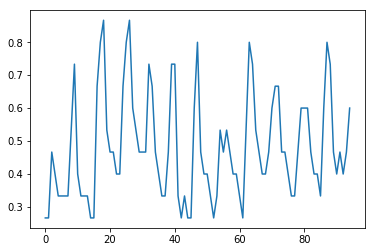

In [118]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

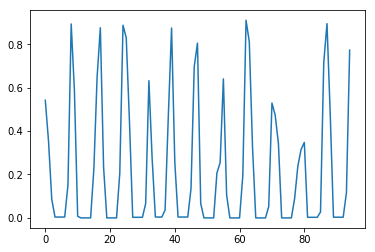

In [119]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

### Validation Set

The neural network trains quickly so we can easily run many training epochs. But then there is a risk of overfitting the model to the training-set so it does not generalize well to unseen data. We will therefore monitor the model's performance on the test-set after each epoch and only save the model's weights if the performance is improved on the test-set.

The batch-generator randomly selects a batch of short sequences from the training-data and uses that during training. But for the validation-data we will instead run through the entire sequence from the test-set and measure the prediction accuracy on that entire sequence.

In [120]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

## Create the Recurrent Neural Network

We are now ready to create the Recurrent Neural Network (RNN). We will use the Keras API for this because of its simplicity. See Tutorial #03-C for a tutorial on Keras and Tutorial #20 for more information on Recurrent Neural Networks.

In [121]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [175]:
model = Sequential()

In [176]:
model.add(GRU(units=100,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))

In [177]:
model.add(Dense(num_y_signals, activation='tanh'))

### Loss Function

We will use Mean Squared Error (MSE) as the loss-function that will be minimized. This measures how closely the model's output matches the true output signals.

However, at the beginning of a sequence, the model has only seen input-signals for a few time-steps, so its generated output may be very inaccurate. Using the loss-value for the early time-steps may cause the model to distort its later output. We therefore give the model a "warmup-period" of 50 time-steps where we don't use its accuracy in the loss-function, in hope of improving the accuracy for later time-steps.

In [178]:
warmup_steps = 50

In [179]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

### Compile Model

This is the optimizer and the beginning learning-rate that we will use.

In [180]:
optimizer = RMSprop(lr=1e-3)

In [181]:
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

In [182]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, None, 100)         43500     
_________________________________________________________________
dense_3 (Dense)              (None, None, 6)           606       
Total params: 44,106
Trainable params: 44,106
Non-trainable params: 0
_________________________________________________________________


### Callback Functions

During training we want to save checkpoints and log the progress to TensorBoard so we create the appropriate callbacks for Keras.

This is the callback for writing checkpoints during training.

In [183]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [184]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [185]:
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [186]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [187]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

## Train the Recurrent Neural Network

We can now train the neural network.

Note that a single "epoch" does not correspond to a single processing of the training-set, because of how the batch-generator randomly selects sub-sequences from the training-set. Instead we have selected `steps_per_epoch` so that one "epoch" is processed in a few minutes.

With these settings, each "epoch" took about 2.5 minutes to process on a GTX 1070. After 14 "epochs" the optimization was stopped because the validation-loss had not decreased for 5 "epochs". This optimization took about 35 minutes to finish.

Also note that the loss sometimes becomes `NaN` (not-a-number). This is often resolved by restarting and running the Notebook again. But it may also be caused by your neural network architecture, learning-rate, batch-size, sequence-length, etc. in which case you may have to modify those settings.

In [188]:
%%time
model.fit_generator(generator=generator,
                    epochs=10,
                    steps_per_epoch=10,
                    validation_data=validation_data,
                    callbacks=callbacks)

Epoch 1/10
 9/10 [==========================>...] - ETA: 0s - loss: 0.0786
Epoch 00001: val_loss improved from inf to 0.06073, saving model to 23_checkpoint.keras
10/10 [==============================] - 1s 116ms/step - loss: 0.0765 - val_loss: 0.0607
Epoch 2/10
 9/10 [==========================>...] - ETA: 0s - loss: 0.0470
Epoch 00002: val_loss improved from 0.06073 to 0.04444, saving model to 23_checkpoint.keras
10/10 [==============================] - 1s 53ms/step - loss: 0.0467 - val_loss: 0.0444
Epoch 3/10
 8/10 [=======================>......] - ETA: 0s - loss: 0.0347
Epoch 00003: val_loss improved from 0.04444 to 0.03738, saving model to 23_checkpoint.keras
10/10 [==============================] - 0s 48ms/step - loss: 0.0341 - val_loss: 0.0374
Epoch 4/10
 9/10 [==========================>...] - ETA: 0s - loss: 0.0286
Epoch 00004: val_loss improved from 0.03738 to 0.03221, saving model to 23_checkpoint.keras
10/10 [==============================] - 1s 55ms/step - loss: 0.0286 - 

### Load Checkpoint

Because we use early-stopping when training the model, it is possible that the model's performance has worsened on the test-set for several epochs before training was stopped. We therefore reload the last saved checkpoint, which should have the best performance on the test-set.

In [189]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

## Save Model จะโหลดมาใช้เมื่อต้องการความเร็ว
dasfkdfadsjf;aklsdfa;sd


In [190]:


# model.save('my_model2.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# returns a compiled model
# identical to the previous one


# Load Model ขึ้นมาใช้งาน

In [191]:
# from keras.models import load_model
# model = load_model('my_model.h5')

## Performance on Test-Set

We can now evaluate the model's performance on the test-set. This function expects a batch of data, but we will just use one long time-series for the test-set, so we just expand the array-dimensionality to create a batch with that one sequence.

In [192]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 14ms/step


In [193]:
print("loss (test-set):", result)

loss (test-set): 0.021060412749648094


In [194]:
target_names = ['mw_30m','mw_60m','mw_90m','mw_120m','mw_150m','mw_180m']
len(target_names)

6

In [195]:
# If you have several metrics you can use this instead.
if False:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

## Generate Predictions

This helper-function plots the predicted and true output-signals.

In [196]:
from sklearn import metrics

In [197]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
#     for signal in range(len(target_names)):
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
#         print(type(signal_pred))
        # Get the true output-signal from the data-set.
        signal_true = y_true[[target_names[signal]]].values
#         print(type(signal_true))
        print('RMSE:', np.sqrt(metrics.mean_squared_error(signal_true, signal_pred)))

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

RMSE: 2.3550652354387904


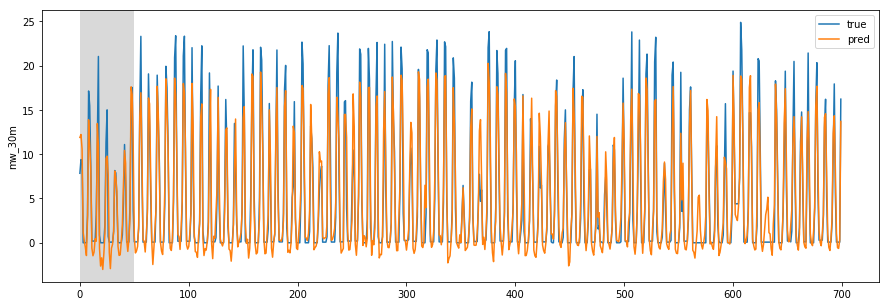

RMSE: 2.6835511267896632


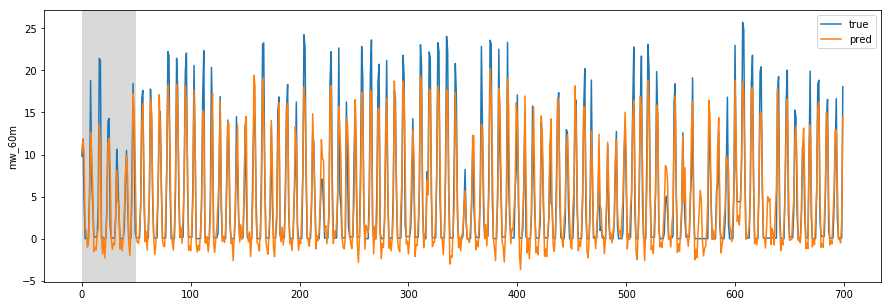

RMSE: 3.2279994087122854


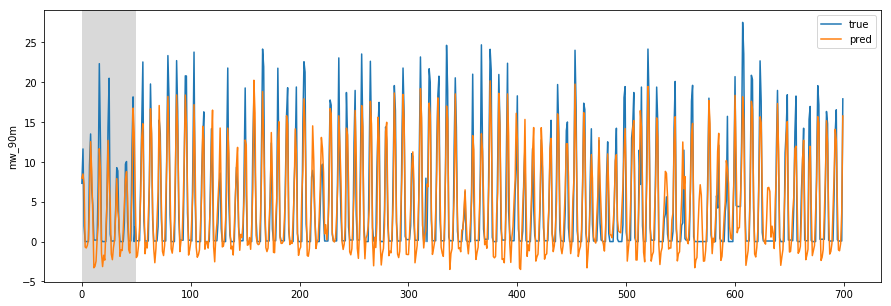

RMSE: 3.3737707651991693


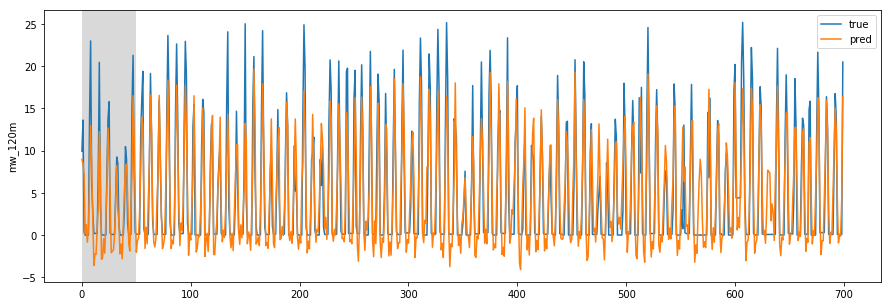

RMSE: 3.790209906381243


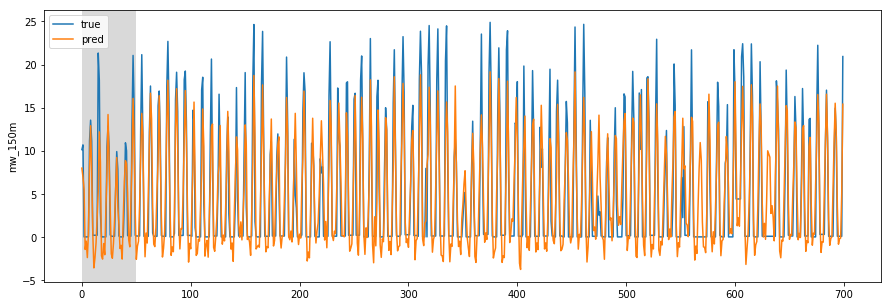

RMSE: 3.973405722457612


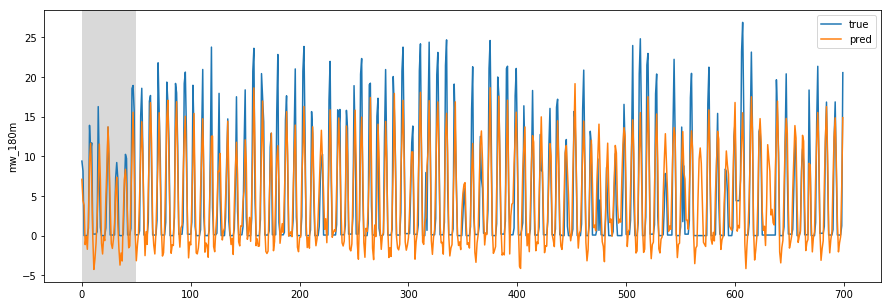

In [201]:
plot_comparison(start_idx=10, length=700, train=True)

RMSE: 2.6593144775826456


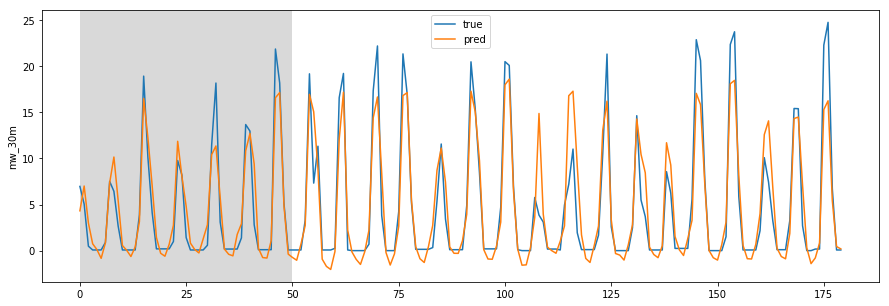

RMSE: 2.8930143295775985


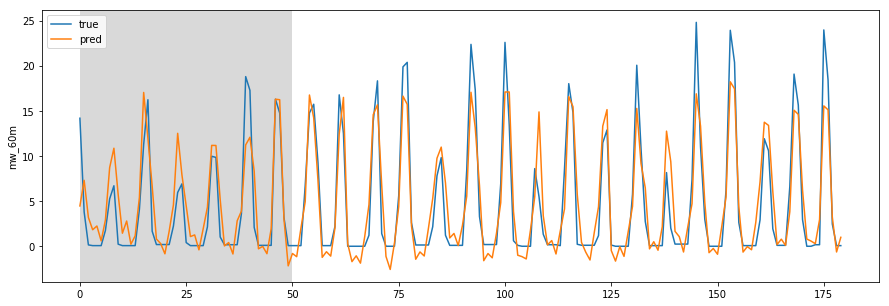

RMSE: 3.5321937191209547


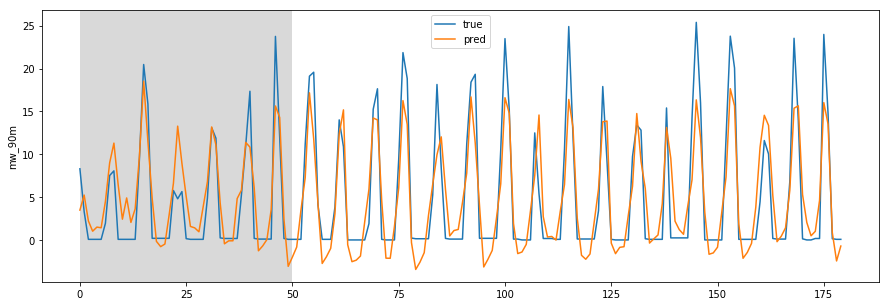

RMSE: 4.000307217502907


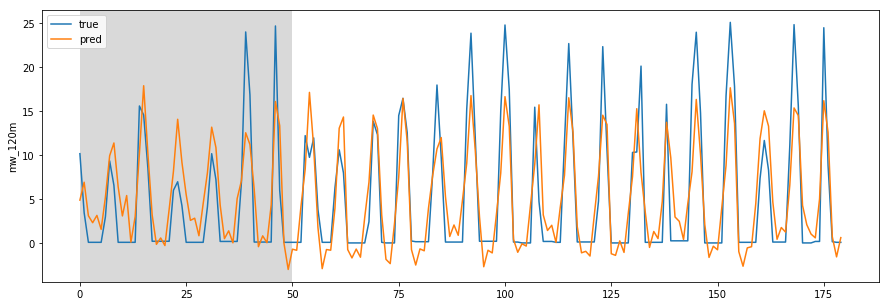

RMSE: 4.166550391860023


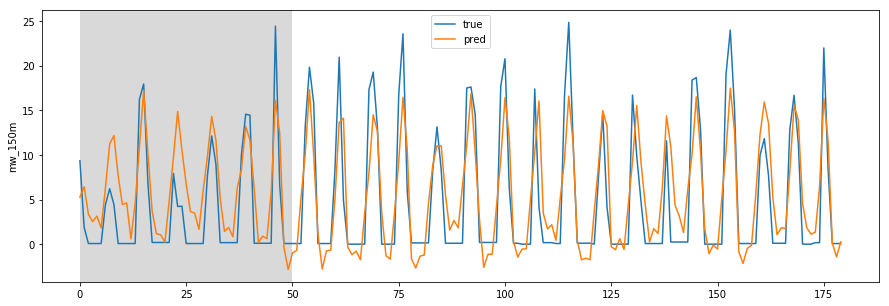

RMSE: 4.344973489096339


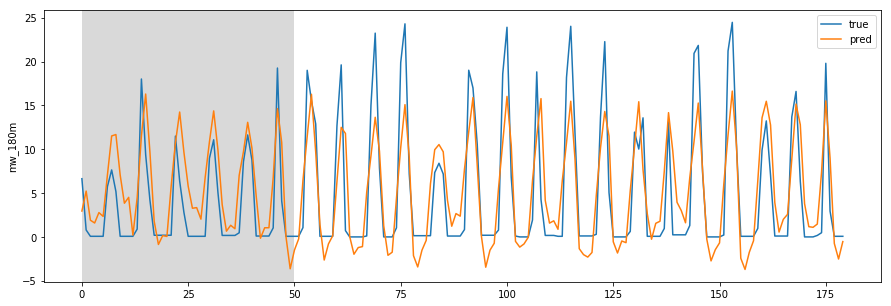

In [200]:
plot_comparison(start_idx=0, length=180, train=False)

In [ ]:
##